# Dissecting Spotify Valence

In this assignment you will dissect Spotify's Valence metric.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr


Spotify uses a metric called *valence* to measure the happiness of a track. The metric itself, however, was not developed by Spotify. It was originally developed by Echo Nest, a company that was bought by Spotify in 2014. We don't know exactly how valence is calculated. Some details are given by a blog post, which you can find here:

https://web.archive.org/web/20170422195736/http://blog.echonest.com/post/66097438564/plotting-musics-emotional-valence-1950-2013

Your task is to untangle the mystery behind valence and propose how this is derived.

Spotify offers the following information that may be relevant to your task:

* [Get Track's Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) and [Get Tracks' Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features).

* [Get Track's Audio Analysis](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis).

To tackle the problem you can use the Spotify charts data from Zenodo at https://doi.org/10.5281/zenodo.4778562, but you are not limitted to that. In fact you are encouraged to use additional data that you may find, or get yourself.

The rank of your assignment will contribute to the grade. That is, if $x$ is the unranked grade of an assignment and $r$ is the respective model’s ranking among $n$ students according to Q2 below, then the final grade will be computed as $0.75x + 2.5[1 - (r-1)/(n-1)]$. 

The ranking will be performed on a test dataset that will be provided in due course. The rank metrics will be Mean Average Error (MAE).

## Questions


### Q1: Expore which Track Features Influence Valence

You will use inferential statistic methods to study how track features influence valence. You must find the best possible model for explaining the valence based on the features that you find significant.

### Q2: Predict Valence

Use Machine Learning techniques to predict valence based on track features:

* You will use at least three different methods. For each methods you should ensure that you tune your hyperparameters as best as you can.

* Once you identify the best method and hyperparameters, explain, to the extent that is possible, which features influence the valence metric.

* You will evaluate your predictions on a holdout testing dataset that will be provided to you. Your evaluation and the value of the MAE on the holdout testing dataset must be included at the end of your submission.

## Submission Instructions

You will submit a Jupyter notebook that will contain all your code and analysis. Ensure that the notebook will run correctly in a computer that is not your own. That means, among other things, that it does not contain absolute paths. Remember that a notebook is not a collection of code cells thrown together; it should contain as much text as necessary for a person to understand what you are doing.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python,  libraries, and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.

## Answers

In [31]:
# Managing the imports of all used libraries
import os
import pandas as pd
import glob
import re
from datetime import datetime

In [3]:
# Reading the data
dir_location = r"C:\Users\jason\My Drive\msc_data_science\1_2 Practical Data Science\Assignment 3\data"

In [4]:
artists_stats = pd.read_csv(dir_location + r"\Artists\spotify_artists_info_complete.csv",sep="\t")
display(artists_stats.head())

hits = pd.read_csv(dir_location + r"\Hit Songs\spotify_hits_dataset_complete.csv",sep="\t")
display(hits.head())
display(hits.shape)

,artist_id,name,followers,popularity,genres,image_url
0,1WgXqy2Dd70QQOU7Ay074N,AURORA,923204,75,['norwegian pop'],https://i.scdn.co/image/87b5228e7ab1c8cc2cf4ec...
1,2dXKh2aHr7RS2RVPlWJoUS,MHD,2707,24,[],https://i.scdn.co/image/ab67616d0000b273c4141b...
2,293zczrfYafIItmnmM3coR,Chuck Berry,1103439,67,"['blues rock', 'classic rock', 'folk rock', 'r...",https://i.scdn.co/image/d58323616d4f5d22b51e9d...
3,4DqRDyrUuJO8CuxfgVCU3m,Hasan.K,38,29,[],NaN
4,1U5zgr455OGyIkLNXvDdrf,Traditional,26672,64,['sleep'],https://i.scdn.co/image/ab67616d0000b273765aa4...


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,16GAMmkIzTIT7aH19TtW3f,Show You,['6M25WWmNO7wK1DnKmd3z6R'],['CXLOE'],45,False,Solo,1,1,79,...,4,0.00560,0.636,0.693,0.000604,0.1140,-6.014,0.0647,0.388,96.090
1,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","['Nafe Smallz', 'Tory Lanez']",58,True,Collaboration,1,2,79,...,3,0.02090,0.614,0.641,0.000000,0.0659,-6.751,0.2880,0.492,123.539
2,7BpYWzZwrsljT1eIjb0TqR,Told You So,['74XFHRwlV6OrjEM0A2NCMF'],['Paramore'],61,False,Solo,3,1,79,...,4,0.00290,0.639,0.814,0.000030,0.0529,-5.632,0.0385,0.904,123.922
3,2GrYIUrAYK5TZhSh0RJV6H,Fantastic Boy,['4Kxlr1PRlDKEB0ekOCyHgX'],['BIGBANG'],0,False,Solo,4,1,0,...,4,0.00231,0.725,0.836,0.000000,0.0927,-3.927,0.0571,0.544,130.053
4,7G7P0AOE4mXWvdSSroLfZA,Told You,['31lnFZEM6ysvjOx59VyxRE'],['Krept & Konan'],0,True,Solo,2,1,0,...,4,0.08830,0.854,0.552,0.000019,0.1510,-7.065,0.0419,0.102,127.966


(13880, 24)

In [ ]:
holdout_ids = pd.read_csv(r"C:\Users\jason\My Drive\msc_data_science\1_2 Practical Data Science\Assignment 3\spotify_ids_holdout.txt", header=None, names=["id"])
holdout_ids


In [30]:
hits

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,16GAMmkIzTIT7aH19TtW3f,Show You,['6M25WWmNO7wK1DnKmd3z6R'],['CXLOE'],45,False,Solo,1,1,79,...,4,0.00560,0.636,0.693,0.000604,0.1140,-6.014,0.0647,0.388,96.090
1,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","['Nafe Smallz', 'Tory Lanez']",58,True,Collaboration,1,2,79,...,3,0.02090,0.614,0.641,0.000000,0.0659,-6.751,0.2880,0.492,123.539
2,7BpYWzZwrsljT1eIjb0TqR,Told You So,['74XFHRwlV6OrjEM0A2NCMF'],['Paramore'],61,False,Solo,3,1,79,...,4,0.00290,0.639,0.814,0.000030,0.0529,-5.632,0.0385,0.904,123.922
3,2GrYIUrAYK5TZhSh0RJV6H,Fantastic Boy,['4Kxlr1PRlDKEB0ekOCyHgX'],['BIGBANG'],0,False,Solo,4,1,0,...,4,0.00231,0.725,0.836,0.000000,0.0927,-3.927,0.0571,0.544,130.053
4,7G7P0AOE4mXWvdSSroLfZA,Told You,['31lnFZEM6ysvjOx59VyxRE'],['Krept & Konan'],0,True,Solo,2,1,0,...,4,0.08830,0.854,0.552,0.000019,0.1510,-7.065,0.0419,0.102,127.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","['Lorenzo', 'LES ANTICIPATEURS']",52,True,Collaboration,7,2,79,...,4,0.20700,0.755,0.737,0.000000,0.1160,-5.770,0.0505,0.753,145.961
13876,5T8zcAE83vyffJ9JUzkZYx,Louis Louis,['6VjbeCqoayiHYnefrisskv'],['Kay One'],46,False,Solo,1,1,79,...,4,0.28400,0.688,0.652,0.000000,0.1710,-6.774,0.1300,0.716,107.912
13877,4YuuLTmHmU4Ihn9gmCJsAR,ヒミツ,['5zV9afUO4DVqJeRaZvfNev'],['POLKADOT STINGRAY'],36,False,Solo,1,1,79,...,4,0.05580,0.477,0.942,0.000000,0.4160,-2.588,0.1710,0.692,165.007
13878,2Gl0FzuLxflY6nPifJp5Dr,First Time,"['23fqKkggKUBHNkbKtXEls4', '0X2BH1fck6amBIoJhD...","['Kygo', 'Ellie Goulding']",70,False,Collaboration,1,2,79,...,4,0.19700,0.633,0.592,0.000000,0.0990,-7.245,0.1120,0.679,90.066


,id
0,7x9aauaA9cu6tyfpHnqDLo
1,56y1jOTK0XSvJzVv9vHQBK
2,3rUGC1vUpkDG9CZFHMur1t
3,01qFKNWq73UfEslI0GvumE
4,2YSzYUF3jWqb9YP9VXmpjE
...,...
1011,3fDTzkvrOo5xQIO480Qmsb
1012,4Ls53fBNVfaXTROBi6X8Hw
1013,5PLqXnvHH7Gh6CcfiUEr7e
1014,0hDE81j4N2DPLbEY4tiCDs


In [90]:
tracks2

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [ ]:
tracks2.merge(artists2,)

In [89]:
artists2

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


586672

In [24]:
ids_to_check = tracks.id.tolist()

ids_to_be_evaluated = holdout_ids.id.tolist()
found = [x for x in ids_to_be_evaluated if x in ids_to_check]

In [36]:
len(found)

190

Generating our training dataset

In [32]:
header = 0
dfs = []
for file in glob.glob(dir_location + '\\Charts\\*\\201?\\*.csv'):    
    # Splitting the file path to get the region and dates
    filenamelist = file.split('\\')

    charts_dir_ind = filenamelist.index('Charts')

    region = filenamelist[charts_dir_ind+1]
    dates = re.findall('\d{4}-\d{2}-\d{2}', file.split('\\')[-1])
    weekly_chart = pd.read_csv(file, header=header, sep='\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0], '%Y-%m-%d')
    weekly_chart['week_end'] = datetime.strptime(dates[1], '%Y-%m-%d')
    weekly_chart['region'] = region
    dfs.append(weekly_chart)

all_charts = pd.concat(dfs)
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us
196,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us
197,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us
198,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us


In [39]:
print('tracks2', len(tracks2))
print('all_charts ', len(all_charts))

tracks2 586672
all_charts  273600


In [34]:
# Kaggle dataset https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?resource=download

tracks2 = pd.read_csv(dir_location + r"\KaggleDataset\tracks.csv")
tracks2

108

In [41]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

features = {}
all_track_ids = list(all_charts['song_id'].unique())

start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

tracks = pd.DataFrame.from_dict(features, orient='index')
tracks.reset_index(inplace=True)
tracks.rename(columns={'index': 'id'})
tracks = tracks.drop(columns=[x for x in tracks.columns if x not in tracks2.columns])


getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

In [88]:
artists2

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [71]:
# Concatenate the two DataFrames with 'id' as the primary key
result_df = pd.concat([tracks, tracks2], ignore_index=True)

# Remove duplicates based on 'id' (if any)
result_df = result_df.drop_duplicates(subset='id')

result_df


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [85]:
output_directory = dir_location + '\\DataUsed\\' + 'merged_dataset.csv'
# Export the DataFrame to a CSV file
result_df.to_csv(output_directory, index=False)  # 

In [86]:
# Read the CSV file back into a DataFrame
imported_df = pd.read_csv(output_directory)

# Display the imported DataFrame
print(imported_df)

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.681   0.594    7    -7.028     1       0.2820        0.1650   
1              0.720   0.763    9    -4.068     0       0.0523        0.4060   
2              0.748   0.524    8    -5.599     1       0.0338        0.4140   
3              0.735   0.451    0    -8.374     1       0.0585        0.0631   
4              0.670   0.838    0    -4.031     1       0.0362        0.0604   
...              ...     ...  ...       ...   ...          ...           ...   
596223         0.560   0.518    0    -7.471     0       0.0292        0.7850   
596224         0.765   0.663    0    -5.223     1       0.0652        0.1410   
596225         0.535   0.314    7   -12.823     0       0.0408        0.8950   
596226         0.696   0.615   10    -6.212     1       0.0345        0.2060   
596227         0.686   0.723    6    -7.067     1       0.0363        0.1050   

        instrumentalness  liveness  val

In [87]:
imported_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,popularity,explicit,artists,id_artists,release_date
0,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.1340,0.5350,186.054,5aAx2yezTd8zXrkmtKl66Z,230453,4,NaN,NaN,NaN,NaN,NaN,NaN
1,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088,4,NaN,NaN,NaN,NaN,NaN,NaN
2,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.6610,95.010,7BKLCZ1jbUBVqRi2FVlTVw,244960,4,NaN,NaN,NaN,NaN,NaN,NaN
3,0.735,0.451,0,-8.374,1,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200,4,NaN,NaN,NaN,NaN,NaN,NaN
4,0.670,0.838,0,-4.031,1,0.0362,0.0604,0.000611,0.1590,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596223,0.560,0.518,0,-7.471,0,0.0292,0.7850,0.000000,0.0648,0.2110,131.896,5rgu12WBIHQtvej2MdHSH0,258267,4,云与海,50.0,0.0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26
596224,0.765,0.663,0,-5.223,1,0.0652,0.1410,0.000297,0.0924,0.6860,150.091,0NuWgxEp51CutD2pJoF4OM,153293,4,blind,72.0,0.0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21
596225,0.535,0.314,7,-12.823,0,0.0408,0.8950,0.000150,0.0874,0.0663,145.095,27Y1N4Q4U3EfDU5Ubw8ws2,187601,4,What They'll Say About Us,70.0,0.0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02
596226,0.696,0.615,10,-6.212,1,0.0345,0.2060,0.000003,0.3050,0.4380,90.029,45XJsGpFTyzbzeWK8VzR8S,142003,4,A Day At A Time,58.0,0.0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05


### Q1: Expore which Track Features Influence Valence

You will use inferential statistic methods to study how track features influence valence. You must find the best possible model for explaining the valence based on the features that you find significant.

In [59]:
tracks

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.1340,0.5350,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.1800,0.7420,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,3NdDpSvN911VPGivFlV5d0,0.735,0.451,0,-8.374,1,0.0585,0.06310,0.000013,0.3250,0.0862,117.973,audio_features,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,https://api.spotify.com/v1/audio-analysis/3NdD...,245200,4
4,78rIJddV4X0HkNAInEcYde,0.670,0.838,0,-4.031,1,0.0362,0.06040,0.000611,0.1590,0.7170,104.998,audio_features,78rIJddV4X0HkNAInEcYde,spotify:track:78rIJddV4X0HkNAInEcYde,https://api.spotify.com/v1/tracks/78rIJddV4X0H...,https://api.spotify.com/v1/audio-analysis/78rI...,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3aQV6E290SJvasp2VOgvBz,0.810,0.690,10,-7.841,0,0.2700,0.03730,0.000000,0.1060,0.6180,139.970,audio_features,3aQV6E290SJvasp2VOgvBz,spotify:track:3aQV6E290SJvasp2VOgvBz,https://api.spotify.com/v1/tracks/3aQV6E290SJv...,https://api.spotify.com/v1/audio-analysis/3aQV...,140369,4
13876,43YQDj1KOPMFAUcTEPKy4p,0.942,0.531,1,-7.510,1,0.2150,0.00236,0.000106,0.0812,0.7400,99.027,audio_features,43YQDj1KOPMFAUcTEPKy4p,spotify:track:43YQDj1KOPMFAUcTEPKy4p,https://api.spotify.com/v1/tracks/43YQDj1KOPMF...,https://api.spotify.com/v1/audio-analysis/43YQ...,157520,4
13877,1985nAkGJf1oOrgHCWftoN,0.762,0.679,4,-7.595,0,0.1920,0.04260,0.000000,0.1860,0.3280,150.051,audio_features,1985nAkGJf1oOrgHCWftoN,spotify:track:1985nAkGJf1oOrgHCWftoN,https://api.spotify.com/v1/tracks/1985nAkGJf1o...,https://api.spotify.com/v1/audio-analysis/1985...,125320,4
13878,7ntUbTIwmwOD6ygCMRZT6e,0.774,0.836,9,-2.323,0,0.1520,0.28800,0.000024,0.0824,0.4940,112.014,audio_features,7ntUbTIwmwOD6ygCMRZT6e,spotify:track:7ntUbTIwmwOD6ygCMRZT6e,https://api.spotify.com/v1/tracks/7ntUbTIwmwOD...,https://api.spotify.com/v1/audio-analysis/7ntU...,201271,4


In [60]:
hits

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,16GAMmkIzTIT7aH19TtW3f,Show You,['6M25WWmNO7wK1DnKmd3z6R'],['CXLOE'],45,False,Solo,1,1,79,...,4,0.00560,0.636,0.693,0.000604,0.1140,-6.014,0.0647,0.388,96.090
1,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","['Nafe Smallz', 'Tory Lanez']",58,True,Collaboration,1,2,79,...,3,0.02090,0.614,0.641,0.000000,0.0659,-6.751,0.2880,0.492,123.539
2,7BpYWzZwrsljT1eIjb0TqR,Told You So,['74XFHRwlV6OrjEM0A2NCMF'],['Paramore'],61,False,Solo,3,1,79,...,4,0.00290,0.639,0.814,0.000030,0.0529,-5.632,0.0385,0.904,123.922
3,2GrYIUrAYK5TZhSh0RJV6H,Fantastic Boy,['4Kxlr1PRlDKEB0ekOCyHgX'],['BIGBANG'],0,False,Solo,4,1,0,...,4,0.00231,0.725,0.836,0.000000,0.0927,-3.927,0.0571,0.544,130.053
4,7G7P0AOE4mXWvdSSroLfZA,Told You,['31lnFZEM6ysvjOx59VyxRE'],['Krept & Konan'],0,True,Solo,2,1,0,...,4,0.08830,0.854,0.552,0.000019,0.1510,-7.065,0.0419,0.102,127.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","['Lorenzo', 'LES ANTICIPATEURS']",52,True,Collaboration,7,2,79,...,4,0.20700,0.755,0.737,0.000000,0.1160,-5.770,0.0505,0.753,145.961
13876,5T8zcAE83vyffJ9JUzkZYx,Louis Louis,['6VjbeCqoayiHYnefrisskv'],['Kay One'],46,False,Solo,1,1,79,...,4,0.28400,0.688,0.652,0.000000,0.1710,-6.774,0.1300,0.716,107.912
13877,4YuuLTmHmU4Ihn9gmCJsAR,ヒミツ,['5zV9afUO4DVqJeRaZvfNev'],['POLKADOT STINGRAY'],36,False,Solo,1,1,79,...,4,0.05580,0.477,0.942,0.000000,0.4160,-2.588,0.1710,0.692,165.007
13878,2Gl0FzuLxflY6nPifJp5Dr,First Time,"['23fqKkggKUBHNkbKtXEls4', '0X2BH1fck6amBIoJhD...","['Kygo', 'Ellie Goulding']",70,False,Collaboration,1,2,79,...,4,0.19700,0.633,0.592,0.000000,0.0990,-7.245,0.1120,0.679,90.066


In [20]:
tracks = tracks.reset_index(drop=True).rename(columns={'id' : 'song_id'})

all_charts = pd.merge(all_charts, tracks[['song_id', 'valence']], on='song_id', how='left')

In [31]:
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region,valence
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au,0.5350
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au,0.7420
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au,0.6610
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au,0.0862
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au,0.7170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us,0.4840
273596,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us,0.6050
273597,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us,0.4010
273598,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us,0.6710


ValueError: could not convert string to float: '5aAx2yezTd8zXrkmtKl66Z'

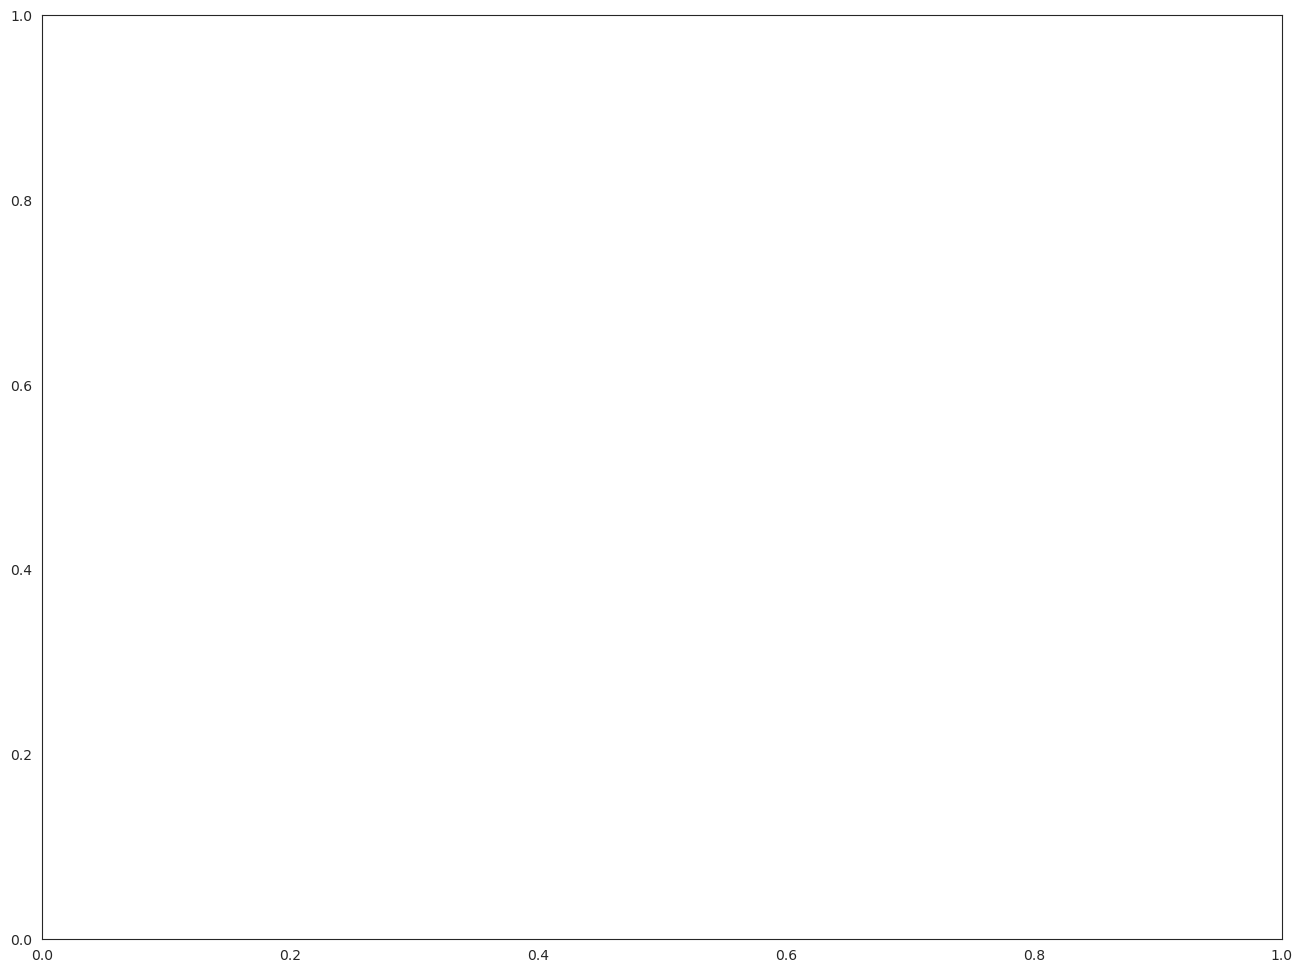

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(all_charts)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(all_charts, mask=mask, square=True, annot = True, annot_kws={'size': 8}, vmax= .24)

In [ ]:
https://ahsieh53632.github.io/music-attributes-and-popularity/

In [ ]:
https://rpubs.com/kdrdatascience/862303

# Spotify Audio Features Explanation

Spotify analyzes the audio of each track to provide a few audio features, which we display on the track page.

Some of them are quite easy to understand, but the meaning of some others are not always clear. As per the Spotify documentation, here is the definition of each audio feature we display. The features for which the values are between 0 and 1 are displayed as percentages on Spot On Track.

## Acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

## Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

## Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

## Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

## Key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

## Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

## Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

## Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

## Speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

## Tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
